In [66]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [31]:
data = pd.read_csv("spam.csv", encoding="latin-1")

In [32]:
data.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [34]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [35]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
data['class'] = data['class'].map({'ham':0,'spam':1})
cv = CountVectorizer()
x = data['message']
y = data['class']

In [40]:
x.shape

(5572,)

In [41]:
y.shape

(5572,)

In [42]:
x = cv.fit_transform(x)

In [43]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [44]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [54]:
x_train.shape

(4457, 8672)

In [55]:
y_train

114     0
1420    0
5431    0
2964    0
1026    0
       ..
2009    0
4589    0
3733    0
4018    1
3082    0
Name: class, Length: 4457, dtype: int64

In [47]:
model = MultinomialNB()

In [48]:
model.fit(x_train,y_train)

MultinomialNB()

In [49]:
model.score(x_test,y_test)

0.9775784753363229

In [50]:
pickle.dump( model, open("spam.pkl","wb"))

In [51]:
pickle.dump( cv, open("vectorizer.pkl","wb"))

In [52]:
msg = "free camcorder"
data = [msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)

[1]


In [60]:
y_pred = model.predict(x_test)

In [68]:
confusion_matrix(y_test,y_pred)

array([[965,  14],
       [ 11, 125]], dtype=int64)

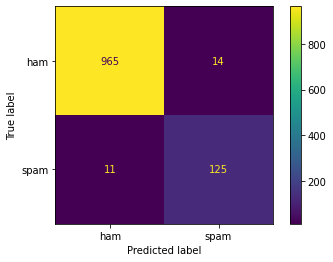

In [67]:
plot_confusion_matrix(model,x_test.toarray(),y_test,display_labels=['ham','spam'])